dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0390329 to fit


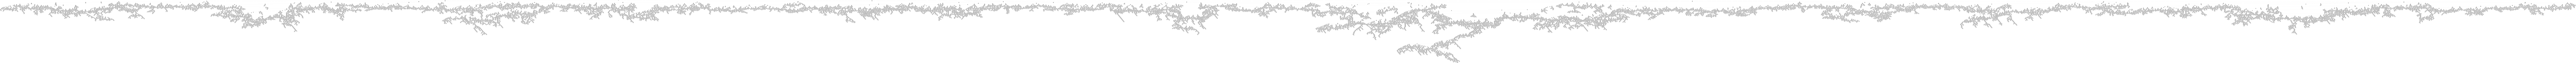

In [16]:
from sklearn import metrics
import pydotplus as pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split


import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

ds = pd.read_csv("././././flights/train.csv")

new_ds = ds.dropna()

x= new_ds.drop(['satisfaction','id','Gender', 'Customer Type','Class','Type of Travel', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service' ], axis=1)
y= new_ds.satisfaction

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

DecisionTree_Class_Model = DecisionTreeClassifier()
DecisionTree_Class_Model.fit(x_train, y_train)

y_pred = DecisionTree_Class_Model.predict(x_test)
y_pred


accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Previsão de Satisfaç�o', 'Previsão de Não satisfeito'],
    index=['Realidade de satisfaç�o', 'Realidade de Não satisfacao']
)

from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

tree.export_graphviz(model, out_file='tree.dot', feature_names=x.columns)

from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')

